In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd

# Load the TikTok video performance data into a Pandas DataFrame
data = pd.read_csv('tiktok_performance.csv')

# Preview the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Check for missing values in the dataset
print("\nMissing values in the dataset:")
print(data.isnull().sum())

# Since there are no missing values, proceed with analysis
data_cleaned = data.copy()



First 5 rows of the dataset:
   Video_ID  User_ID Username      Video_Title  Category  Likes  Comments  \
0       101        1    user1  Dance Challenge     Dance   1500       120   
1       102        2    user2       Funny Skit    Comedy   2300       200   
2       103        3    user3         Tutorial  Tutorial   1200       150   
3       104        4    user4      Viral Dance     Dance   4500       500   
4       105        5    user5    Comedy Sketch    Comedy   1800       180   

   Shares  Views Upload_Date  Video_Length   Hashtags  User_Followers  \
0     300  50000  2024-08-01            30     #dance            1500   
1     400  70000  2024-08-02            45     #funny            2000   
2     250  40000  2024-08-03            60  #tutorial            1200   
3     600  90000  2024-08-04            30     #viral            1800   
4     210  50000  2024-08-05            45    #comedy            1500   

   User_Following  User_Likes  
0             300        5000  
1    


Basic Statistics for 'Views':
Mean: 60000.0
Median: 50000.0
Mode: 50000
Standard Deviation: 17888.54381999832

Mean Views per Video Category:
Category
Comedy      60000.0
Dance       70000.0
Tutorial    40000.0
Name: Views, dtype: float64

Summary Statistics per Video Category:
           Likes                    Comments                  Shares       \
            mean   sum          std     mean  sum         std   mean  sum   
Category                                                                    
Comedy    2050.0  4100   353.553391    190.0  380   14.142136  305.0  610   
Dance     3000.0  6000  2121.320344    310.0  620  268.700577  450.0  900   
Tutorial  1200.0  1200          NaN    150.0  150         NaN  250.0  250   

                      
                 std  
Category              
Comedy    134.350288  
Dance     212.132034  
Tutorial         NaN  

First 5 rows with Engagement Rate:
   Views  Engagement_Rate
0  50000         0.038400
1  70000         0.041429
2  40

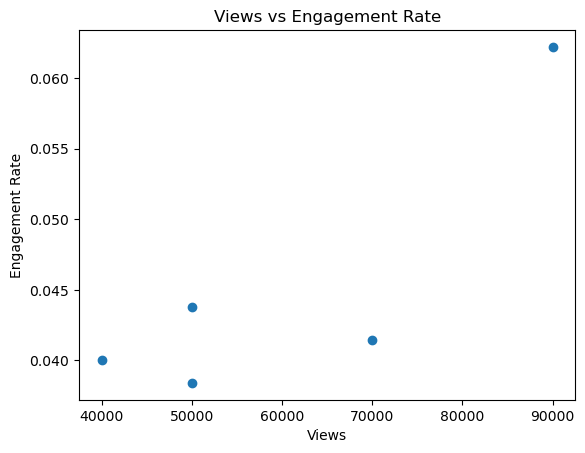

In [6]:
# BASIC OPERATIONS USING NUMPY 

# Calculating Mean, Median, Mode, and Standard Deviation for the 'Views' column
views = data_cleaned['Views']

mean_views = np.mean(views)
median_views = np.median(views)
mode_views = views.mode()[0]  # Mode in Pandas
std_views = np.std(views)

print(f"\nBasic Statistics for 'Views':")
print(f"Mean: {mean_views}")
print(f"Median: {median_views}")
print(f"Mode: {mode_views}")
print(f"Standard Deviation: {std_views}")

# ADVANCED OPERATIONS USING PANDAS

# Group the data by 'Category' and calculate the mean number of views
grouped_data = data_cleaned.groupby('Category')['Views'].mean()
print(f"\nMean Views per Video Category:\n{grouped_data}")

# Group by 'Category' and get summary statistics for 'Likes', 'Comments', and 'Shares'
grouped_summary = data_cleaned.groupby('Category')[['Likes', 'Comments', 'Shares']].agg(['mean', 'sum', 'std'])
print(f"\nSummary Statistics per Video Category:\n{grouped_summary}")

# Create a new column to calculate the engagement rate (Likes + Comments + Shares) / Views
data_cleaned['Engagement_Rate'] = (data_cleaned['Likes'] + data_cleaned['Comments'] + data_cleaned['Shares']) / data_cleaned['Views']
print(f"\nFirst 5 rows with Engagement Rate:\n{data_cleaned[['Views', 'Engagement_Rate']].head()}")

# APPLYING FUNCTIONS WITH NUMPY

data_cleaned['Log_Views'] = np.log1p(data_cleaned['Views']) 
print(f"\nFirst 5 rows with log-transformed views:\n{data_cleaned[['Views', 'Log_Views']].head()}")

high_performance_videos = data_cleaned[data_cleaned['Views'] > 50_000]
print(f"\nHigh Performance Videos (Views > 50,000):\n{high_performance_videos.head()}")

# DATA VISUALIZATION 

# Plot views vs engagement rate
import matplotlib.pyplot as plt

plt.scatter(data_cleaned['Views'], data_cleaned['Engagement_Rate'])
plt.xlabel('Views')
plt.ylabel('Engagement Rate')
plt.title('Views vs Engagement Rate')
plt.show()